In [46]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

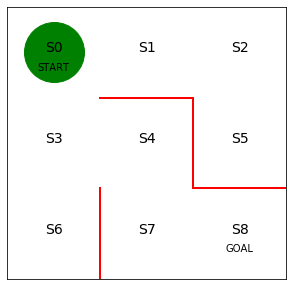

In [47]:
#draw maze

fig = plt.figure(figsize = (5,5))
ax = plt.gca()

#draw redwall

plt.plot([1,1], [0,1], color='red', linewidth=2)
plt.plot([1,2], [2,2], color = 'red', linewidth =2 )
plt.plot([2,2], [2,1], color = 'red', linewidth = 2)
plt.plot([2,3], [1,1], color = 'red', linewidth = 2)

#states

plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size = 14, ha= 'center')
plt.text(0.5, 1.5, 'S3', size = 14, ha = 'center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size = 14, ha = 'center')
plt.text(0.5,0.5,'S6', size = 14, ha = 'center')
plt.text(1.5, 0.5, 'S7', size = 14, ha = 'center')
plt.text(2.5, 0.5, 'S8', size = 14, ha = 'center')
plt.text(0.5, 2.3, 'START', ha = 'center')
plt.text(2.5, 0.3, 'GOAL', ha = 'center')

# draw settings
ax.set_xlim(0,3)
ax.set_ylim(0,3)
plt.tick_params(axis='both', which='both', bottom=False, top=False,
               labelbottom=False, right=False, left=False, labelleft=False)

# draw agent
line, = ax.plot([0.5], [2.5], marker="o", color = 'g', markersize = 60)

In [48]:
# Initial Value of parameter theta_0
# Each row represents up, right, down, left
theta_0 = np.array([[np.nan, 1, 1, np.nan], #s0
                   [np.nan, 1, np.nan, 1], #s1
                   [np.nan, np.nan, 1, 1], #s2
                    [1, 1, 1, np.nan], #s3
                    [np.nan, np.nan, 1, 1], #s4
                    [1, np.nan, np.nan, np.nan], #s5
                    [1, np.nan, np.nan, np.nan], #s6
                    [1, 1, np.nan, np.nan] #s7
                   ]) #s8 does not have a policy because it is GOAL

[a,b] = theta_0.shape
Q = np.random.rand(a, b) * theta_0 # mult theta_0 for nan values


In [49]:
def simple_convert_into_pi_from_theta(theta):

    [m, n] = theta.shape
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :]/np.nansum(theta[i, :])

    pi = np.nan_to_num(pi)

    return pi

pi_0 = simple_convert_into_pi_from_theta(theta_0)

In [50]:
# epsilon greedy algorithm

def get_action(s, Q, epsilon, pi_0):
    direction = ["up", "right", "down", "left"]

    # choose action

    if np.random.rand() < epsilon:
        # choose random action
        next_direction = np.random.choice(direction, p = pi_0[s,:])
    else:
        next_direction = direction[np.nanargmax(Q[s, :])]
    
    if next_direction == "up":
        action = 0
    elif next_direction == "right":
        action = 1
    elif next_direction == "down":
        action = 2
    elif next_direction == "left":
        action = 3
    
    return action

def get_s_next(s, a, Q, epsilon, pi_0):
    direction = ["up", "right", "down", "left"]
    next_direction = direction[a] #direction of action a

    if next_direction == "up":
        s_next = s - 3
    elif next_direction == "right":
        s_next = s + 1
    elif next_direction == "down":
        s_next = s + 3
    elif next_direction == "left":
        s_next = s - 1

    return s_next
    
        

In [51]:
def Q_learning(s,a,r,s_next,a_next,Q, eta, gamma):

    if s_next == 8: #terminal state
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])

    else:
        Q[s, a] = Q[s, a] + eta * (r + gamma * np.nanmax(Q[s_next, :]) - Q[s, a])

    return Q

In [52]:
def goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi):
    s = 0
    a = a_next = get_action(s, Q, epsilon, pi)
    s_a_history = [[0, np.nan]] 

    while(1):
        a = a_next
        s_a_history[-1][1] = a

        s_next = get_s_next(s, a, Q, epsilon, pi)
        s_a_history.append([s_next, np.nan])

        if s_next == 8:
            r = 1
            a_next = np.nan
        else:
            r = 0
            a_next = get_action(s_next,Q,epsilon,pi)

        Q = Q_learning(s, a, r, s_next, a_next, Q, eta, gamma)

        if s_next == 8:
            break
        else:
            s = s_next
    
    return [s_a_history ,Q]


In [53]:
# get out of maze using SARSA

eta = 0.1 #learning rate
gamma = 0.9 #decay
epsilon = 0.5 #initial epsilon value
v = np.nanmax(Q, axis = 1) #compute max value of Q
is_continue = True
episode = 1

while is_continue:
    print("Episode: " + str(episode))

    epsilon = epsilon/2

    [s_a_history, Q] = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0)

    new_v = np.nanmax(Q, axis = 1)
    print(np.sum(np.abs(new_v - v)))
   
    v = new_v

    print("It took " + str(len(s_a_history) - 1) + "steps to terminal state.")

    #iterate for 100 episodes
    episode = episode + 1
    if episode > 100:
        break



Episode: 1
0.12930336202121562
It took 12steps to terminal state.
Episode: 2
1.4094077696120455
It took 260steps to terminal state.
Episode: 3
0.9653234997643898
It took 272steps to terminal state.
Episode: 4
0.3589667062903925
It took 132steps to terminal state.
Episode: 5
0.08485879281846556
It took 20steps to terminal state.
Episode: 6
0.0617458379255616
It took 4steps to terminal state.
Episode: 7
0.06078095201217493
It took 4steps to terminal state.
Episode: 8
0.059758247740582415
It took 4steps to terminal state.
Episode: 9
0.05869520812729295
It took 4steps to terminal state.
Episode: 10
0.05760347704356539
It took 4steps to terminal state.
Episode: 11
0.05649047365454213
It took 4steps to terminal state.
Episode: 12
0.05536064728121359
It took 4steps to terminal state.
Episode: 13
0.054216441258014336
It took 4steps to terminal state.
Episode: 14
0.053059022630515096
It took 4steps to terminal state.
Episode: 15
0.051888824663178124
It took 4steps to terminal state.
Episode: 16